In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [19]:
# Load the dataset
file_path = 'C:/Users/M.TECH/Desktop/data analytics and buisness intelligence digiskills/data analysis and bi digiskills downloads/Superstore_USA.xlsx'
dataset = pd.read_excel(file_path)
# Display the first few rows of the dataset


dataset.head(2)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522


In [20]:
dataset.shape


(9426, 24)

In [21]:
#check missing values in dataset
dataset.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [22]:
# Handle missing values in the 'Product Base Margin' column
dataset = dataset.assign(**{'Product Base Margin': dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean())})



In [23]:
# Count the values in the 'Order Priority' column
order_priority_counts = dataset['Order Priority'].value_counts()
print(order_priority_counts)

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64


In [24]:
# Get unique values in the 'Order Priority' column
unique_order_priorities = dataset['Order Priority'].unique()
print(unique_order_priorities)

# Clean 'Order Priority' column by removing extra spaces
dataset['Order Priority'] = dataset['Order Priority'].str.strip()

# Verify the cleaning process
unique_order_priorities_cleaned = dataset['Order Priority'].unique()
print(unique_order_priorities_cleaned)

# Replace specific values if needed
dataset['Order Priority'] = dataset['Order Priority'].replace('Critical ', 'Critical')


['Not Specified' 'High' 'Medium' 'Low' 'Critical' 'Critical ']
['Not Specified' 'High' 'Medium' 'Low' 'Critical']


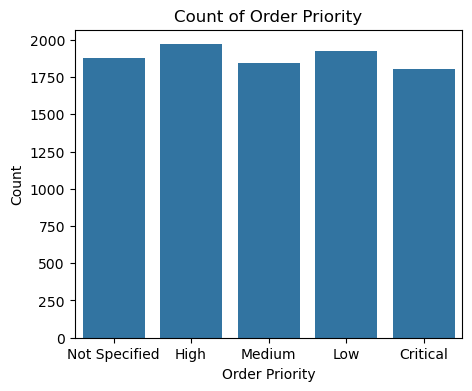

In [25]:
# Visualize and save the order priority counts using count plot
plt.figure(figsize=(5, 4))
sns.countplot(x='Order Priority', data=dataset)
plt.title('Count of Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Count')
plt.savefig('Count_of_Order_Priority.jpg', format='jpg')
plt.show()

In [26]:
dataset['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [27]:
x=dataset['Ship Mode'].value_counts().index
y=dataset['Ship Mode'].value_counts().values



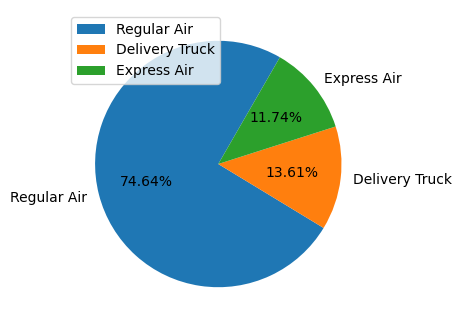

In [28]:
plt.figure(figsize=(5, 4))
plt.pie(y,labels=x, startangle =60 ,autopct="%0.2f%%")

plt.legend(loc=2)
plt.show()

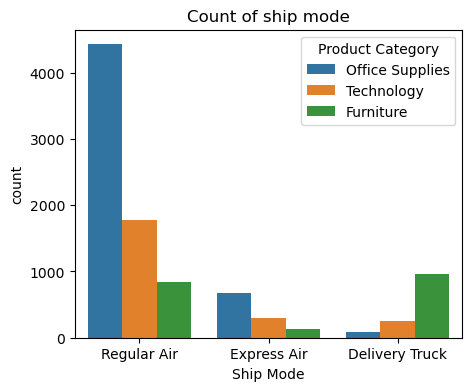

In [29]:
# Visualize ship mode counts using count plot bivariate analysis
plt.figure(figsize=(5, 4))
sns.countplot(x='Ship Mode', data=dataset, hue="Product Category")
plt.title('Count of ship mode')
plt.savefig('Count of ship mode.jpg', format='jpg')
plt.show()

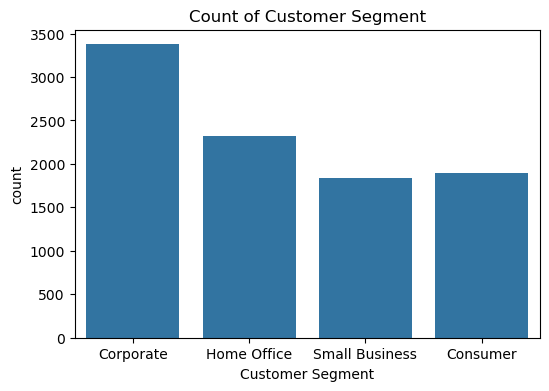

In [30]:
# Visualize customer segment counts using count plot bivariate analysis 
plt.figure(figsize=(6, 4))
sns.countplot(x='Customer Segment', data=dataset)
plt.title('Count of Customer Segment')
plt.savefig('Count of Customer Segment.jpg', format='jpg')
plt.show()

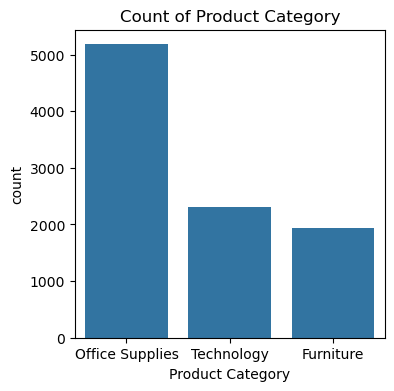

In [36]:
# Visualize product base margin using bar plot  
plt.figure(figsize=(4, 4))
sns.barplot(x='Product Category',y='Product Base Margin', data=dataset, estimator='sum')
plt.title('product base margin')
plt.savefig('product base margin.jpg', format='jpg')
plt.show()

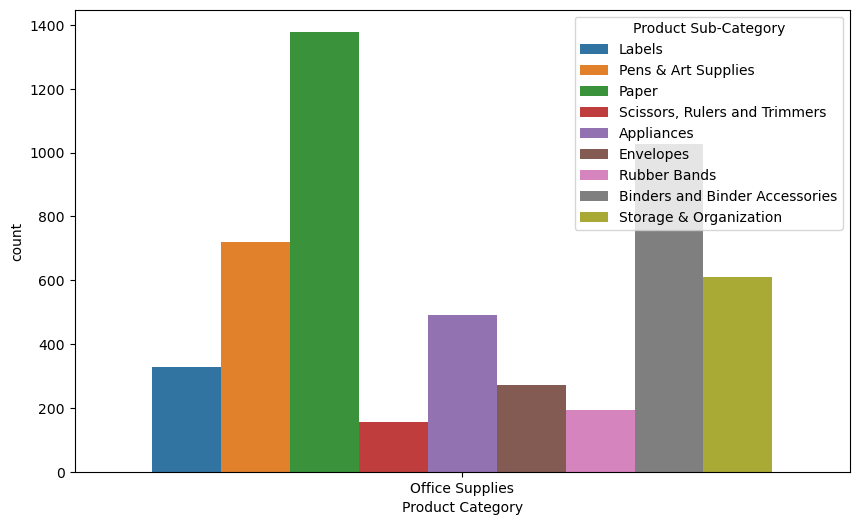

In [32]:
# Visualize product sub category office supplies using count plot bivariate analysis 
plt.figure(figsize=(10, 6))
sns.countplot(x='Product Category', data=dataset[dataset["Product Category"]=="Office Supplies"],hue="Product Sub-Category")
plt.savefig('Count of office supplies.jpg', format='jpg')
plt.show()

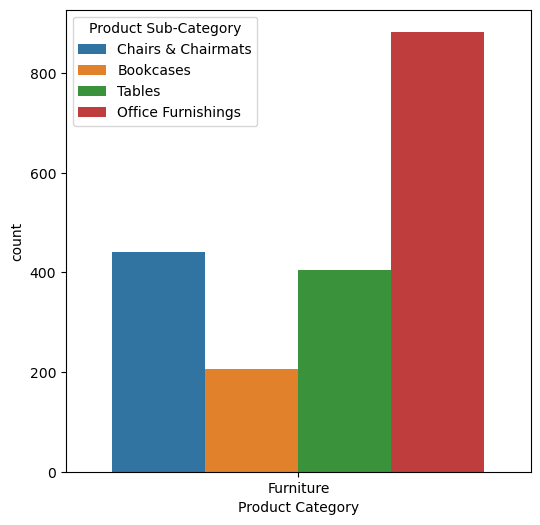

In [35]:
# Visualize product sub category Furniture using count plot bivariate analysis 
plt.figure(figsize=(6, 6))
sns.countplot(x='Product Category', data=dataset[dataset["Product Category"]=="Furniture"],hue="Product Sub-Category")
plt.savefig('Count of Furniture.jpg', format='jpg')
plt.show()

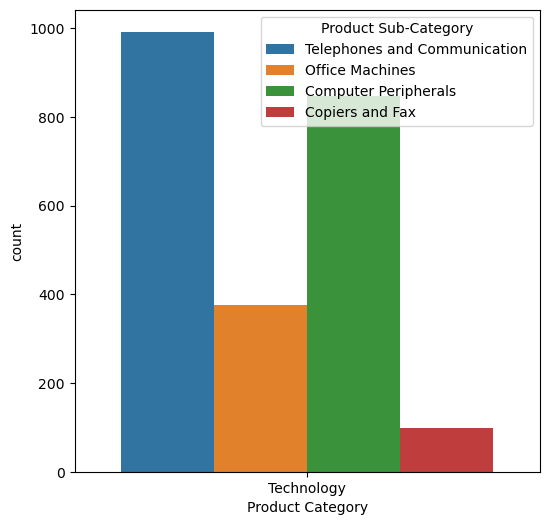

In [37]:
# Visualize product sub category Technology using count plot bivariate analysis 
plt.figure(figsize=(6, 6))
sns.countplot(x='Product Category', data=dataset[dataset["Product Category"]=="Technology"],hue="Product Sub-Category")
plt.savefig('Count of Technology.jpg', format='jpg')
plt.show()

In [39]:
dataset["Order year"]=dataset['Order Date'].dt.year

In [43]:
dataset['Order year'].value_counts()

Order year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

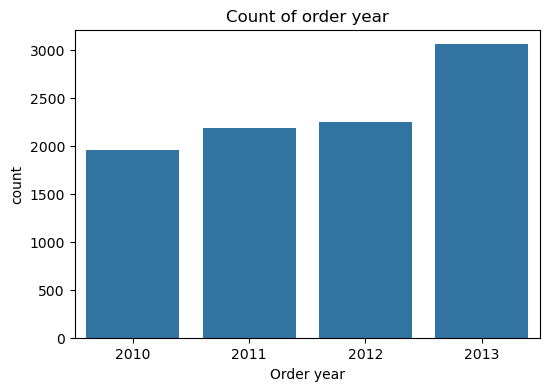

In [44]:
# Visualize order year counts using count plot  
plt.figure(figsize=(6, 4))
sns.countplot(x='Order year', data=dataset)
plt.title('Count of order year')
plt.savefig('Count of order year.jpg', format='jpg')
plt.show()

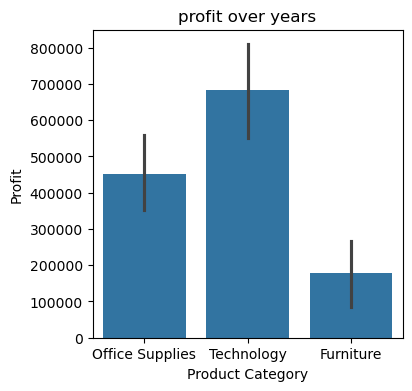

In [47]:
# Visualize profit over years using bar plot  
plt.figure(figsize=(4, 4))
sns.barplot(x='Product Category',y='Profit', data=dataset, estimator='sum')
plt.title('profit over years')
plt.savefig('profit over years.jpg', format='jpg')
plt.show()

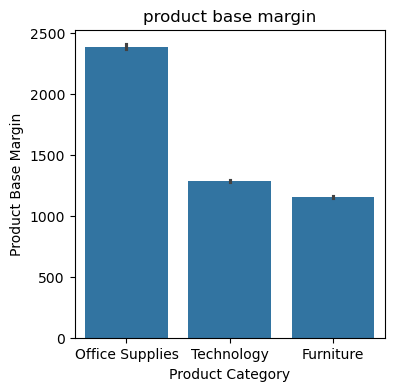

In [50]:
# Visualize product base margin using bar plot  
plt.figure(figsize=(4, 4))
sns.barplot(x='Product Category',y='Product Base Margin', data=dataset, estimator='sum')
plt.title('product base margin')
plt.savefig('product base margin.jpg', format='jpg')
plt.show()

In [49]:
dataset['State or Province'].value_counts()[:5]

State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64

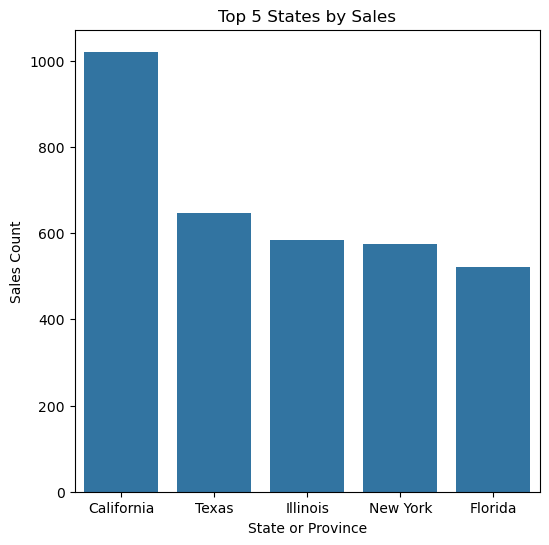

In [53]:
# Calculate sales counts per state
state_sales_counts = dataset['State or Province'].value_counts().nlargest(5)

# Filter the dataset to include only the top 5 states
top_5_states = dataset[dataset['State or Province'].isin(state_sales_counts.index)]

# Visualize state-wise sales counts for the top 5 states using count plot
plt.figure(figsize=(6, 6))
sns.countplot(x='State or Province', data=top_5_states, order=state_sales_counts.index)
plt.title('Top 5 States by Sales')
plt.xlabel('State or Province')
plt.ylabel('Sales Count')
plt.savefig('top_5_state_sales.jpg', format='jpg')
plt.show()